In [1]:
import json
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
import folium

In [2]:
START_STATION ="東京駅"
with open("station.json") as f:
    stations = json.load(f)
stations

{'東京駅': {'北緯': 35.68103925, '東経': 139.76687221},
 '渋谷駅': {'北緯': 35.6576647, '東経': 139.70140706},
 '新宿駅': {'北緯': 35.68928492, '東経': 139.69960462},
 '上野駅': {'北緯': 35.71402851, '東経': 139.77728139},
 '池袋駅': {'北緯': 35.72919625, '東経': 139.71073396}}

In [3]:
names = []
for s in stations:
        names.append(s)
co = []
for s in stations:
    co.append([stations[s]["北緯"],stations[s]["東経"]])
co = np.array(co)

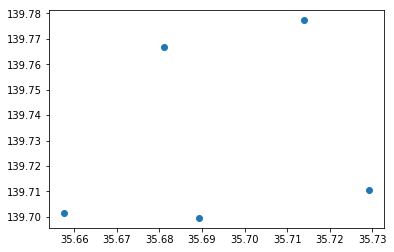

In [4]:
plt.plot(co[:,0],co[:,1], 'o')
plt.show()

In [5]:
from folium import *

m = folium.Map(location = [35.68103925,139.76687221],
           tiles='OpenStreetMap',
           zoom_start=13)
m

In [96]:
tokyo_station = [35.681236, 139.767125]
tokyo_tower = [35.658581, 139.745433]
gri = [35.6597, 139.75195]
marker = folium.Marker(
    location=[35.6597, 139.75195], 
    popup='hogehoge',                    
    icon=folium.Icon(color='orange'))
line = folium.vector_layers.PolyLine(
            locations=[tokyo_station,                     
                       gri,                          
                       tokyo_tower],                   
            color='black',                                  
            weight=10)
# マーカーと線の地図レイヤへの追加
m.add_child(marker)
m.add_child(line)
m

In [85]:
x = co[:, 0]
y = co[:, 1]
distance_matrix = np.sqrt((x[:, np.newaxis] - x[np.newaxis, :]) ** 2 +
                          (y[:, np.newaxis] - y[np.newaxis, :]) ** 2)

In [ ]:
# 試しに適当に距離を計算
test_order = list(np.random.permutation(N))
print('訪問順序 = {}'.format(test_order))

total = calculate_total_distance(test_order, distance_matrix)
print('総移動距離 = {}'.format(total))

In [15]:
# 虎ノ門ヒルズの緯度経度
office_lat = 35.66687568
office_lng = 139.74947495

fmap1 = folium.Map(
    location=[office_lat, office_lng],
    tiles = "OpenStreetMap",
    zoom_start = 20, # 描画時の倍率 1〜20
    width = 800, height = 800 # 地図のサイズ
) 
fmap1.save("1.html")